# Anormal dection - Isolation forest

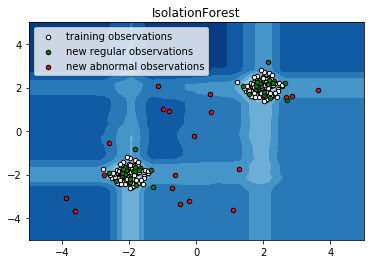

In [454]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.show()

# Anormal dection - local outlier factor

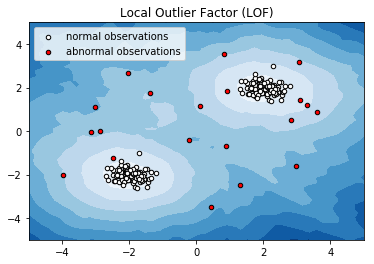

In [2]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white', edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red', edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],  ["normal observations", "abnormal observations"], loc="upper left")
plt.show()

# Case1 time based prediction

### Fetures

#### CPU load 0 ~ 100
#### Mem used 0 ~ 100
#### Network IO 0 ~ 100

In [132]:
def retrieveHourOfDay(h, size):
    x = np.arange(size, dtype=int)
    return np.full_like(x, 100 * h/ 24, dtype=np.double)

def generateTimeRange(startHour, endHour, batch_size):
    hoursofday = np.array([])
    for hour in range(startHour, endHour + 1):
        hoursofday = np.append(hoursofday, retrieveHourOfDay(hour, batch_size))
    return hoursofday

def generateCPULoadOrNetwork(start, end, data_size):
    return np.reshape(np.random.uniform(start, end, data_size), (data_size, 1))

In [463]:
def train_normal():
    
    # idle data from 01:00 to 06:00
    cpu_load_1 = generateCPULoadOrNetwork(10, 20, 300)
    net_work_1 = generateCPULoadOrNetwork(10, 20, 300)
    hourofday_1 = generateTimeRange(1, 6, 50)
    
    # growing data from 07:00 to 09:00
    cpu_load_2 = generateCPULoadOrNetwork(20, 30, 150)
    net_work_2 = generateCPULoadOrNetwork(20, 30, 150)
    hourofday_2 = generateTimeRange(7, 9, 50)
    
    # busy data from 10:00 to 18:00
    cpu_load_3 = generateCPULoadOrNetwork(30, 50, 450)
    net_work_3 = generateCPULoadOrNetwork(30, 50, 450)
    hourofday_3 = generateTimeRange(10, 18, 50)
    
    # decrease data from 19:00 to 21:00
    cpu_load_4 = generateCPULoadOrNetwork(20, 30, 150)
    net_work_4 = generateCPULoadOrNetwork(20, 30, 150)
    hourofday_4 = generateTimeRange(19, 21, 50)
    
    # idle data from 21:00 to 24:00
    cpu_load_5 = generateCPULoadOrNetwork(10, 20, 200)
    net_work_5 = generateCPULoadOrNetwork(10, 20, 200)
    hourofday_5 = generateTimeRange(21, 24, 50)
    
    # concate busy, growing, decrease and idle data
    cpu_load = np.r_[cpu_load_1, cpu_load_2, cpu_load_3, cpu_load_4, cpu_load_5]
    net_work = np.r_[net_work_1, net_work_2, net_work_3, net_work_4, net_work_5]
    hourofday = np.reshape(np.r_[hourofday_1, hourofday_2, hourofday_3, hourofday_4, hourofday_5], (1250, 1))
    # stack data as feature matrix
    features = np.hstack((cpu_load, net_work, hourofday))
    # Train model
    clf_iso_forest = IsolationForest(n_estimators=100, max_samples=100, contamination=0.2, max_features=3, random_state=rng)
    clf_iso_forest.fit(features)
    return features, clf_iso_forest

In [358]:
def predict(cpu_load, net_work, time, model):
    hourofday = retrieveHourOfDay(time, 1)
    feature = np.reshape(np.hstack((cpu_load, net_work, hourofday)),(1, 3))
    prediction = model.predict(feature)
    return feature, prediction

In [460]:
def plot_data(normal_features, test_features, prediction, angle):
    color = 'g'
    if (prediction == -1):
        color = 'r'
    # create figure
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('TIME')
    ax.set_ylabel('CPU')
    ax.set_zlabel('NETWORK IO')
    # add scatters
    ax.scatter(normal_features[:,-1:], normal_features[:,:1], normal_features[:,1:2], c='skyblue', marker='^')
    ax.scatter(test_features[:,-1:], test_features[:, :1], test_features[:, 1:2], c=color, marker='o')
    ax.view_init(30, 140 + angle)
    filename = 'plot' + str(int(angle/10 - 4)) + '.jpg'
    plt.savefig(filename)

In [464]:
features, model = train_normal()

In [467]:
test_feature, prediction = predict(25, 25, 1, model)

print(test_feature, prediction)

#for angle in range(5, 21):
#    r = angle * 10
#    plot_data(features, test_feature, prediction, r)

[[25.         25.          4.16666667]] [-1]


In [376]:
print(np.random.normal(5, 5, 20))

[ 5.52276768 10.26793453  5.71368979  0.91523428  5.78205069 -4.53032061
  5.39590753  7.0278332  -3.42871354  6.49211969  6.05828461  1.08635275
 11.22839971  4.07406603 10.64977049  4.68564266 -1.7788949   3.36709396
  4.55553062  6.38098905]
